In [1]:
import pandas as pd
bbs=pd.read_csv("bbs.csv")
news=pd.read_csv("news.csv")

In [2]:
print(bbs.shape)
print(news.shape)

(58078, 10)
(247273, 9)


In [3]:
stock2016=pd.read_csv("2016.csv").drop("Unnamed: 0",axis=1)
stock2017=pd.read_csv("2017.csv").drop("Unnamed: 0",axis=1)
stock2018=pd.read_csv("2018.csv").drop("Unnamed: 0",axis=1)

In [4]:
stock2016.head()

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),成交筆數(筆),流通在外股數(千股),本益比-TSE,股價淨值比-TSE
0,1101 台泥,2016-12-30,29.09,29.64,28.93,29.64,6121,213121,2939,3692175,20.56,1.23
1,1102 亞泥,2016-12-30,24.91,24.91,24.67,24.81,3347,88078,1227,3361447,31.75,0.73
2,1103 嘉泥,2016-12-30,8.29,8.29,8.29,8.29,0,0,0,774780,11.19,0.40
3,1104 環泥,2016-12-30,21.19,21.54,21.19,21.54,141,3492,115,634572,9.27,0.97
4,1108 幸福,2016-12-30,8.55,8.60,8.53,8.55,90,822,33,404738,10.99,0.78


In [5]:
import re
import string
bbs["content"]=bbs["content"].apply(lambda x :re.sub(r'[^\u4e00-\u9fff]+',"",str(x)))
news["content"]=news["content"].apply(lambda x :re.sub(r'[^\u4e00-\u9fff]+',"",str(x)))


bbs["title"]=bbs["title"].apply(lambda x :re.sub(r'[^\u4e00-\u9fff]+',"",str(x)))
news["title"]=news["title"].apply(lambda x :re.sub(r'[^\u4e00-\u9fff]+',"",str(x)))


print(bbs["title"].iloc[3])
print("\n")
print(bbs["content"].iloc[3])

新聞睽違年大宇資重返台北電玩展


原文連結必須檢附原文內容大宇資訊宣布睽違年後正式回歸台北國際電玩展並帶來大經典同時大宇資訊也邀請玩家一同同樂推出大宇經典遊戲角色大賽邀請玩家扮演大宇各種經典遊戲角色共同為大宇資訊年以來首次回歸參展熱烈慶祝台灣電玩界中年度盛事台北國際電玩展一直以來都是各家遊戲廠商與玩家們所企盼的重點活動過去大宇資訊也曾一起參與盛事受到玩家們的歡迎與好評但從年以後大宇資訊缺席了台北國際電玩展玩家區攤位讓眾多玩家感到惋惜與失望今年大宇資訊將睽違年後強勢回歸展出共個攤位為國內國產遊戲廠商參展的最大展出攤位必將盛況空前此次更帶來大經典作品包括軒轅劍仙劍奇俠傳大富翁明星志願天使帝國與阿貓阿狗等大宇資訊表示年間我們推出了許多好評作品不論是單機或是手遊都有相當不錯的表現玩家給予我們肯定我們也會更加努力地研發更多經典遊戲以提供玩家與市場更多有趣好玩的作品因此年我們將以這些玩家好評為出發點透過這次的台北國際電玩展展出更多有趣好玩的新作品以不負玩家們的期待經典不斷的大宇資訊這次除了回歸參展台北國際電玩展與展出大經典遊戲之外更是廣邀玩家族群一同參與大宇經典遊戲角色大賽讓更多玩家除了喜愛遊戲之外也是鼓勵玩家扮演自己所喜愛的大宇經典遊戲角色為這次台北國際電玩展與大宇資訊參展同樂歡慶蕭文康台北報導心得評論必需填寫傳說中的十年磨二劍大宇真的靠著一個仙劍奇俠傳打遍天下無敵手但是第二劍的軒轅劍看起來也是萬夫莫敵之威大富翁阿貓阿狗更不用說惹看起來前景有點不可思議公司股價列為幻夢比


In [6]:
news=news.dropna(subset= ['content'])
print(news.shape)

(247273, 9)


In [7]:
checkin=["大立光"]
check=[0]*news.shape[0]
for i in range(news.shape[0]):
    temp=0
    for j in checkin:
        temp+=news["content"].iloc[i].count(j)  
        temp+=news["title"].iloc[i].count(j) 
    if temp>=1:
        check[i]=1
    else:
        check[i]=check[i]

In [8]:
news["check"]=check
news=news[news["check"]==1]
print(news.shape)

(11464, 10)


In [9]:
news.head()

,id,p_type,s_name,s_area_name,post_time,title,author,content,page_url,check
12,1451613407274_N01,news,yahoo股市,重大要聞,2016/1/1 09:27:00,各報要聞年台股漲像,時報資訊,年台股昨日封關四大基金在尾盤大舉加碼買進台積電國泰金等權值股總計投入約億元政府基金表示美國升...,https://tw.stock.yahoo.com/news_content/url/d/...,1
69,1451783510043_N01,news,yahoo股市,重大要聞,2016/1/3 08:58:00,各報要聞檔電子股去年可賺股本,時報資訊,景氣不佳電子業成了去年放無薪假的大戶但在一片不景氣聲中還是有科技公司逆流而上初估年有檔個股具...,https://tw.stock.yahoo.com/news_content/url/d/...,1
70,1451783511311_N01,news,yahoo股市,重大要聞,2016/1/3 08:59:00,各報要聞外資歸隊台股帶量拚季線,時報資訊,台股上周封關日集中及櫃買兩市場同步收紅本周為年元月首周市場聚焦新掛牌股外資歸隊主要公司去年月...,https://tw.stock.yahoo.com/news_content/url/d/...,1
106,1451867211260_N01,news,yahoo股市,重大要聞,2016/1/4 07:56:00,經濟日報晨訊,財訊快報,台積電奈米完勝三星製程強壓對手的奈米蘋果代工大單可望入袋三星暫緩擴廠腳步台北車展舊換新訂單出...,https://tw.stock.yahoo.com/news_content/url/d/...,1
142,1451872607731_N01,news,yahoo股市,重大要聞,2016/1/4 09:29:00,台股新春開盤早盤重挫點,中央社,中央社台北年月日電台股今天是年第個交易日早盤即上演開低走低重挫走勢至時分止指數重跌點來到點主...,https://tw.stock.yahoo.com/news_content/url/d/...,1


In [10]:
news["content"].iloc[1]

'景氣不佳電子業成了去年放無薪假的大戶但在一片不景氣聲中還是有科技公司逆流而上初估年有檔個股具一股賺一股實力其中股王大立光更是鶴立雞群法人更看好全年上看元不僅創下台股空前紀錄更立下難以超越的大立光障礙儘管利空頻傳但年還是有很多科技公司跳出不景氣的框架合計去年前三季超過元的電子股就有檔搶先在第三季就宣告達陣一股賺一股者也不在少數包含大立光碩禾可成漢微科華碩楠梓電川湖群聯旭隼聯發科神準鼎翰長華譜瑞弘塑矽力聯亞鎧勝等共計檔占比達成其中去年最會賺錢的非大立光莫屬光前三季就賺進元法人預估第季因少了巨額匯兌利益挹注表現恐不若第季的元但仍有賺進元實力總計年每股獲利有望攀抵元較年的元再成長成以上緊追在後的太陽能股王碩禾受惠於太陽能產業氣觸底反彈年第季業績持續暢旺估計全年上看元更有法人喊出年每股獲利挑戰元的目標儘管如此碩禾每股獲利相較於大立光仍僅成出頭年雖然仍有檔科技股有賺進一個股本的實力不過其中有部分公司業績其實是倒退嚕包括一度貴為股王的漢微科及華碩聯發科譜瑞昂寶聯詠新普等檔其中設計股占了檔且設計股王聯發科年前三季獲利更少見地遽減成足見紅色供應鏈對設計族群衝擊力道著實驚人新聞來源工商時報記者鄭淑芳台北報導'

In [11]:
check=[0]*bbs.shape[0]
for i in range(bbs.shape[0]):
    temp=0
    for j in checkin:
        temp+=bbs["content"].iloc[i].count(j)  
        temp+=bbs["title"].iloc[i].count(j)
    if temp>=1:
        check[i]=1
    else:
        check[i]=check[i]

In [12]:
bbs["check"]=check
bbs=bbs[bbs["check"]==1]
print(bbs.shape)

(1127, 11)


In [13]:
bbs.head(5)

,id,p_type,s_name,s_area_name,comment_count,post_time,title,author,content,page_url,check
8,1451614936232_PTT02R,bbs,Ptt,Stock,74,2016/1/1 10:17:46,新聞大基金封關加碼億年台股漲像,f204137,原文連結必須檢附原文內容工商時報記者崔慈悌王姿琳台北報導年台股昨日封關四大基金在尾盤大舉加碼...,http://www.ptt.cc/bbs/Stock/M.1451614669.A.9C1...,1
152,1451979914468_PTT02R,bbs,Ptt,Stock,52,2016/1/5 15:35:58,新聞大立光月合併營收億元,Reg1001,發文前請先詳閱新聞分類發文規範未依規範發文將受處份連結過長請善用縮網址連結能不能點擊者板規處...,http://www.ptt.cc/bbs/Stock/M.1451979361.A.D0A...,1
168,1451999495481_PTT02R,bbs,Ptt,Stock,46,2016/1/5 21:02:33,新聞罕見大立光去年月營收年減,allenyalun,原文連結必須檢附原文內容罕見大立光去年月營收年減中央社記者韓婷婷台北日電大立光電公布去年月合...,http://www.ptt.cc/bbs/Stock/M.1451998955.A.88A...,1
173,1452003341385_PTT02R,bbs,Ptt,Stock,53,2016/1/5 22:05:22,新聞大立光業績免驚外資喊到元,littledan,原文連結必須檢附原文內容股王大立光今天公告月營收億元月減成創下年月以來單月最低紀錄顯示蘋果光...,http://www.ptt.cc/bbs/Stock/M.1452002725.A.A9A...,1
174,1452003341731_PTT02R,bbs,Ptt,Stock,0,2016/1/5 22:14:47,公告板開始舉辦樂透,IanLi,大立光請到板按參與樂透一張幣迷你級樂透結束時間,http://www.ptt.cc/bbs/Stock/M.1452003288.A.23D...,1


In [14]:
final_data=pd.concat([bbs[["post_time",'title','content']],news[["post_time",'title','content']]],axis=0)
print(final_data.shape)

(12591, 3)


In [15]:
final_data["post_time"]=final_data["post_time"].apply(lambda x:pd.to_datetime(x))
final_data["weekday"]=final_data["post_time"].apply(lambda x:x.weekday())
print(pd.value_counts(final_data["weekday"]))

1    2418
4    2410
2    2390
3    2386
0    2322
5     395
6     270
Name: weekday, dtype: int64


In [16]:
stock2016["年月日"]=stock2016["年月日"].apply(lambda x:pd.to_datetime(x))
stock2017["年月日"]=stock2017["年月日"].apply(lambda x:pd.to_datetime(x))
stock2018["年月日"]=stock2018["年月日"].apply(lambda x:pd.to_datetime(x))

In [17]:
stock2016=stock2016[stock2016["證券代碼"]=="3008 大立光"]
stock2017=stock2017[stock2017["證券代碼"]=="3008 大立光"]
stock2018=stock2018[stock2018["證券代碼"]=="3008 大立光"]

In [18]:
stock2016=stock2016.iloc[::-1]
stock2017=stock2017.iloc[::-1]
stock2018=stock2018.iloc[::-1]

In [19]:
stock2016.head()

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),成交筆數(筆),流通在外股數(千股),本益比-TSE,股價淨值比-TSE
223187,3008 大立光,2016-01-04,2156.10,2170.44,2079.61,2079.61,677,1504074,677,134140,11.73,5.13
222279,3008 大立光,2016-01-05,2036.58,2060.49,2007.90,2017.46,1749,3717277,1672,134140,11.38,4.98
221370,3008 大立光,2016-01-06,1826.23,1878.82,1816.67,1874.04,3026,5811883,2494,134140,10.57,4.63
220461,3008 大立光,2016-01-07,1845.36,1859.70,1735.40,1749.74,2607,4885579,2462,134140,9.87,4.32
219552,3008 大立光,2016-01-08,1721.06,1912.29,1711.50,1888.38,2099,4014847,2060,134140,10.65,4.66


In [20]:
stock2016["漲跌"]=stock2016["收盤價(元)"].pct_change(periods=1)
stock2017["漲跌"]=stock2017["收盤價(元)"].pct_change(periods=1)
stock2018["漲跌"]=stock2018["收盤價(元)"].pct_change(periods=1)

stock2016.head()

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),成交筆數(筆),流通在外股數(千股),本益比-TSE,股價淨值比-TSE,漲跌
223187,3008 大立光,2016-01-04,2156.10,2170.44,2079.61,2079.61,677,1504074,677,134140,11.73,5.13,NaN
222279,3008 大立光,2016-01-05,2036.58,2060.49,2007.90,2017.46,1749,3717277,1672,134140,11.38,4.98,-0.029885
221370,3008 大立光,2016-01-06,1826.23,1878.82,1816.67,1874.04,3026,5811883,2494,134140,10.57,4.63,-0.071089
220461,3008 大立光,2016-01-07,1845.36,1859.70,1735.40,1749.74,2607,4885579,2462,134140,9.87,4.32,-0.066327
219552,3008 大立光,2016-01-08,1721.06,1912.29,1711.50,1888.38,2099,4014847,2060,134140,10.65,4.66,0.079235


In [21]:
stock2016=stock2016.iloc[1:]
stock2017=stock2017.iloc[1:]
stock2018=stock2018.iloc[1:]
stock2018.head()

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),成交筆數(筆),流通在外股數(千股),本益比-TSE,股價淨值比-TSE,漲跌
236327,3008 大立光,2018-01-03,4274.29,4274.29,4077.54,4077.54,842,3584849,983,134140,21.53,6.61,-0.025852
235377,3008 大立光,2018-01-04,4092.30,4116.89,4013.60,4067.71,516,2135595,597,134140,21.48,6.59,-0.002411
234427,3008 大立光,2018-01-05,4102.14,4102.14,3920.15,4033.28,829,3377411,874,134140,21.29,6.53,-0.008464
233477,3008 大立光,2018-01-08,3757.83,3890.64,3743.08,3866.04,1180,4584189,1499,134140,20.41,6.26,-0.041465
232527,3008 大立光,2018-01-09,3841.45,3910.31,3669.30,3684.05,1385,5296494,1738,134140,19.45,5.97,-0.047074


In [22]:
testing=pd.concat([stock2016,stock2017,stock2018],axis=0)
testing.head()

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),成交筆數(筆),流通在外股數(千股),本益比-TSE,股價淨值比-TSE,漲跌
222279,3008 大立光,2016-01-05,2036.58,2060.49,2007.90,2017.46,1749,3717277,1672,134140,11.38,4.98,-0.029885
221370,3008 大立光,2016-01-06,1826.23,1878.82,1816.67,1874.04,3026,5811883,2494,134140,10.57,4.63,-0.071089
220461,3008 大立光,2016-01-07,1845.36,1859.70,1735.40,1749.74,2607,4885579,2462,134140,9.87,4.32,-0.066327
219552,3008 大立光,2016-01-08,1721.06,1912.29,1711.50,1888.38,2099,4014847,2060,134140,10.65,4.66,0.079235
218643,3008 大立光,2016-01-11,1874.04,1921.85,1845.36,1850.14,1168,2298989,1224,134140,10.44,4.57,-0.020250


[]

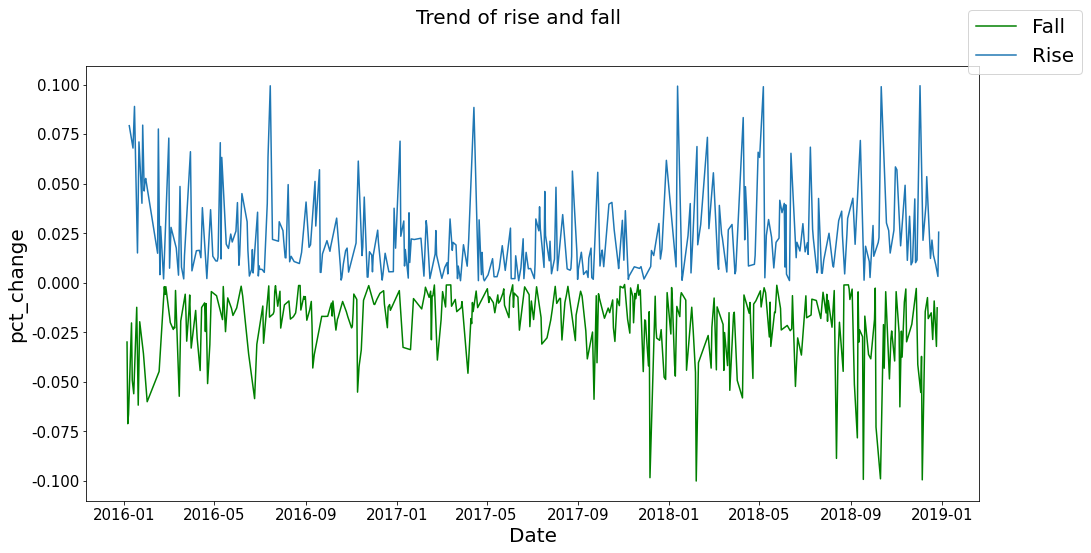

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False
fig, ax = plt.subplots(figsize=(16,8))
stockmin=testing[testing["漲跌"]<0].set_index("年月日")
stockplus=testing[testing["漲跌"]>0].set_index('年月日')
sns.lineplot(x=stockmin.index, y = '漲跌', data=stockmin, color='g')
sns.lineplot(x=stockplus.index, y = '漲跌', data=stockplus)
ax.set_xlabel ('Date', fontsize=20)
ax.set_ylabel ('pct_change', fontsize=20)
ax.tick_params(labelsize=15)
fig.suptitle('Trend of rise and fall' , fontsize=20)
fig.legend(['Fall',"Rise"], fontsize=20)
plt.plot()

In [24]:
final_data["post_time"]=final_data["post_time"].apply(lambda x:x.replace(hour=0, minute=0, second=0, microsecond=0))

In [25]:
import numpy as np
def judge2016(x):
    if  x>0 and x>np.percentile(stock2016[stock2016["漲跌"]>0]["漲跌"],50):
        return "rise"
    elif x<0 and x<np.percentile(stock2016[stock2016["漲跌"]<0]["漲跌"],50):
        return "fall"
    else:
        return "same"
def judge2017(x):
    if  x>0 and x>np.percentile(stock2017[stock2017["漲跌"]>0]["漲跌"],50):
        return "rise"
    elif x<0 and x<np.percentile(stock2017[stock2017["漲跌"]<0]["漲跌"],50):
        return "fall"
    else:
        return "same"
def judge2018(x):
    if   x>0 and x>np.percentile(stock2018[stock2018["漲跌"]>0]["漲跌"],50):
        return "rise"
    elif x<0 and x<np.percentile(stock2018[stock2018["漲跌"]<0]["漲跌"],50):
        return "fall"
    else:
        return "same"

In [26]:
stock2016[stock2016["漲跌"]<0]["漲跌"].describe()

count    113.000000
mean      -0.019600
std        0.015839
min       -0.071089
25%       -0.023874
50%       -0.015407
75%       -0.009176
max       -0.001373
Name: 漲跌, dtype: float64

In [27]:
stock2016["看漲看跌"]=stock2016["漲跌"].apply(judge2016)
stock2017["看漲看跌"]=stock2017["漲跌"].apply(judge2017)
stock2018["看漲看跌"]=stock2018["漲跌"].apply(judge2018)

In [28]:
stock2016["看漲看跌"].value_counts()

same    128
rise     59
fall     56
Name: 看漲看跌, dtype: int64

In [29]:
"""
Monday      predict Tuesday +1
Tuesday     predict Wednesday +1
Wednesday   predict Thursday +1
Thursday    predict Friday +1
Friday      predict Monday +3
Saturday    predict Monday +2
Sunday      predict Monday +1
"""
from datetime import timedelta
#delta = timedelta(days=?)
final_data["tag"]=""

In [30]:
data2016=final_data[final_data["post_time"]<"2017"]
data2017=final_data[final_data["post_time"]<"2018"]
data2018=final_data[final_data["post_time"]<"2019"]

In [31]:
import warnings
warnings.filterwarnings('ignore')
ans2016=[]
for i in range(len(data2016)):
    if data2016["weekday"].iloc[i]==0 or data2016["weekday"].iloc[i]==1 or data2016["weekday"].iloc[i]==2 or data2016["weekday"].iloc[i]==3 or data2016["weekday"].iloc[i]==4:
        check=data2016["post_time"].iloc[i]+timedelta(days=1)
        ans2016.append(stock2016[stock2016["年月日"]==check]["看漲看跌"].values)
    elif  data2016["weekday"].iloc[i]==5:
        check=data2016["post_time"].iloc[i]+timedelta(days=3)
        ans2016.append(stock2016[stock2016["年月日"]==check]["看漲看跌"].values) 
    else:
        check=data2016["post_time"].iloc[i]+timedelta(days=2)
        ans2016.append(stock2016[stock2016["年月日"]==check]["看漲看跌"].values)

data2016["tag"]=ans2016
data2016["len"]=data2016["tag"].apply(lambda x:len(x))
data2016=data2016[data2016["len"]!=0]
        
ans2017=[]
for i in range(len(data2017)):
    if data2017["weekday"].iloc[i]==0 or data2017["weekday"].iloc[i]==1 or data2017["weekday"].iloc[i]==2 or data2017["weekday"].iloc[i]==3 or data2017["weekday"].iloc[i]==4 :
        check=data2017["post_time"].iloc[i]+timedelta(days=1)
        ans2017.append(stock2017[stock2017["年月日"]==check]["看漲看跌"].values)
    elif  data2017["weekday"].iloc[i]==5:
        check=data2017["post_time"].iloc[i]+timedelta(days=3)
        ans2017.append(stock2017[stock2017["年月日"]==check]["看漲看跌"].values) 
    else:
        check=data2017["post_time"].iloc[i]+timedelta(days=2)
        ans2017.append(stock2017[stock2017["年月日"]==check]["看漲看跌"].values)

data2017["tag"]=ans2017
data2017["len"]=data2017["tag"].apply(lambda x:len(x))
data2017=data2017[data2017["len"]!=0]

ans2018=[]
for i in range(len(data2018)):
    if data2018["weekday"].iloc[i]==0 or data2018["weekday"].iloc[i]==1 or data2018["weekday"].iloc[i]==2 or data2018["weekday"].iloc[i]==3 or data2018["weekday"].iloc[i]==4 :
        check=data2018["post_time"].iloc[i]+timedelta(days=1)
        ans2018.append(stock2018[stock2018["年月日"]==check]["看漲看跌"].values)
    elif  data2018["weekday"].iloc[i]==5:
        check=data2018["post_time"].iloc[i]+timedelta(days=3)
        ans2018.append(stock2018[stock2018["年月日"]==check]["看漲看跌"].values) 
    else:
        check=data2018["post_time"].iloc[i]+timedelta(days=2)
        ans2018.append(stock2018[stock2018["年月日"]==check]["看漲看跌"].values)

data2018["tag"]=ans2018
data2018["len"]=data2018["tag"].apply(lambda x:len(x))
data2018=data2018[data2018["len"]!=0]


In [32]:
final=pd.concat([data2016,data2017,data2018],axis=0).drop("len",axis=1)
final["tag"]=final["tag"].apply(lambda x:x[0])
final.head()

,post_time,title,content,weekday,tag
152,2016-01-05,新聞大立光月合併營收億元,發文前請先詳閱新聞分類發文規範未依規範發文將受處份連結過長請善用縮網址連結能不能點擊者板規處...,1,fall
168,2016-01-05,新聞罕見大立光去年月營收年減,原文連結必須檢附原文內容罕見大立光去年月營收年減中央社記者韓婷婷台北日電大立光電公布去年月合...,1,fall
173,2016-01-05,新聞大立光業績免驚外資喊到元,原文連結必須檢附原文內容股王大立光今天公告月營收億元月減成創下年月以來單月最低紀錄顯示蘋果光...,1,fall
174,2016-01-05,公告板開始舉辦樂透,大立光請到板按參與樂透一張幣迷你級樂透結束時間,1,fall
189,2016-01-06,新聞賣超差傳通路庫存爆滿,賣超差傳通路庫存爆滿蘋果砍單三成時間年月日上午聚財網新聞記者陳瑞哲報導大立光前月營收大減三成...,2,fall


In [33]:
final.set_index("post_time").to_csv("data_with_tag.csv")

In [34]:
#stock2018[stock2018["年月日"]=="2018-12-26"]

In [35]:
#final.tail(50)

In [36]:
print(final.shape)

(10041, 5)


In [37]:
#final["content"].iloc[0]
pd.value_counts(final["tag"])

same    5235
fall    2543
rise    2263
Name: tag, dtype: int64